# Model Selection using RFE (Housing Case Study)

### Importing and Understanding Data

In [120]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [121]:
# Importing libraries
import pandas as pd
import numpy as np

In [122]:
# Importing Housing.csv
housing = pd.read_csv('Housing.csv')

In [123]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [124]:
# Checking Null values
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [125]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### Data Preparation

In [126]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [127]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [128]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

status = pd.get_dummies(housing['furnishingstatus'])

status = status.astype(int)
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [129]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [130]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

housing = housing.astype(int)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Splitting the Data into Training and Testing Sets

In [131]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [133]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


### Dividing into X and Y sets for the model building

In [134]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [135]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [136]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 11)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [137]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('unfurnished', True, 1)]

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [139]:
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [140]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [141]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [142]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [143]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     70.70
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           7.97e-84
Time:                        15:40:40   Log-Likelihood:                 379.84
No. Observations:                 381   AIC:                            -735.7
Df Residuals:                     369   BIC:                            -688.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0232      0.019     

`Bedrooms` is insignificant in presence of other variables; can be dropped

In [144]:
X_train_new = X_train_rfe.drop(["bedrooms"], axis = 1)

Rebuilding the model without `bedrooms`

In [145]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [146]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [147]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           3.13e-84
Time:                        15:40:42   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [148]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [149]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [150]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [151]:
y_train_price = lm.predict(X_train_lm)

In [152]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

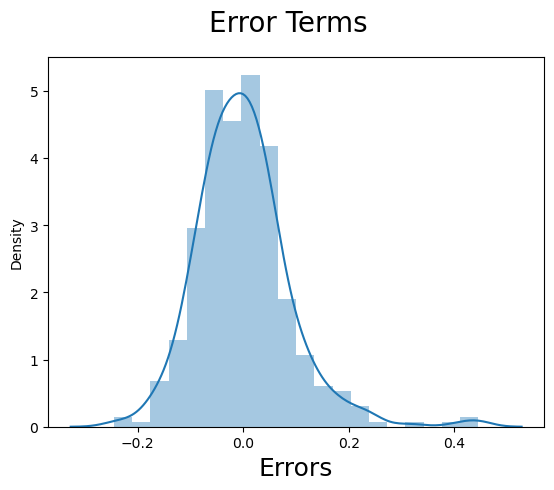

In [153]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [154]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [155]:
y_test = df_test.pop('price')
X_test = df_test

In [156]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [157]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

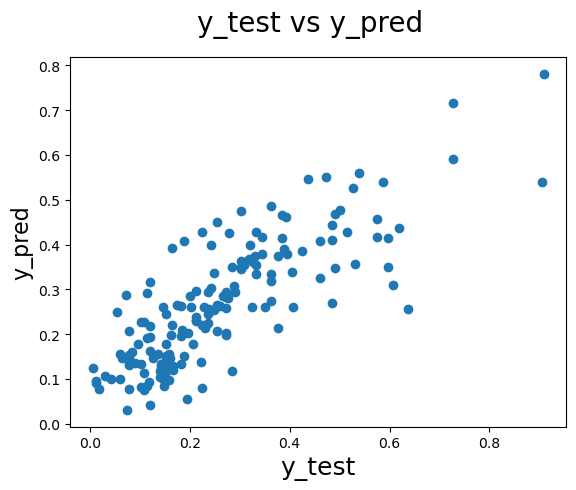

In [158]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [159]:
from sklearn import metrics
r2_score(y_test, y_pred)

0.660134403021964

### We can see that the equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒=0.236×𝑎𝑟𝑒𝑎+0.202×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.04×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.0876×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.0682×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0637×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0337×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑

Overall we have a decent model, but we also acknowledge that we could do better.

We have a couple of options:

1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model

## RANDOM FOREST REGRESSOR

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf = RandomForestRegressor(random_state = 42, max_depth = 5, min_samples_leaf = 10, n_jobs = -1)

In [109]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [110]:
sample_tree = rf.estimators_[10]

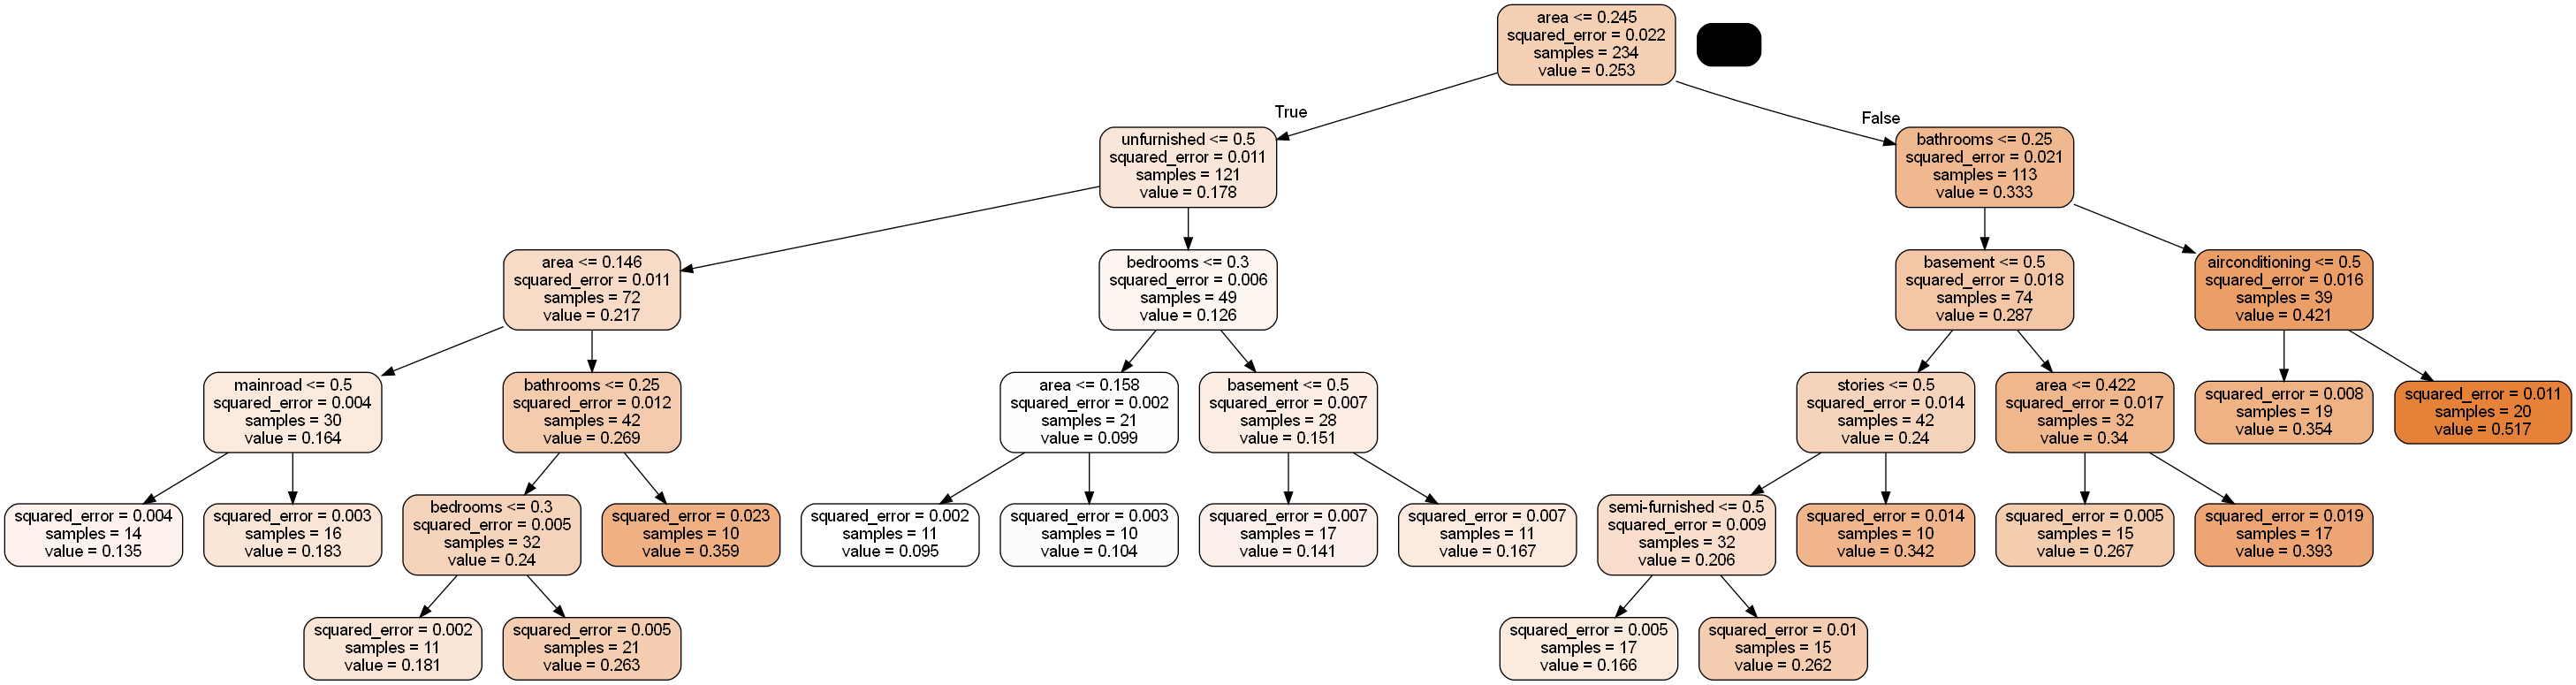

In [111]:
from IPython.display import Image
from io import StringIO

from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(sample_tree,  out_file = dot_data, filled = True, 
               rounded = True, feature_names = X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [112]:
y_train_Pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [114]:
r2_score(y_train, y_train_Pred)

0.6781302045288894

In [115]:
r2_score(y_test, y_test_pred)

0.5846197187829347

In [116]:
rf.feature_importances_

array([0.52087594, 0.01381103, 0.26738773, 0.01914681, 0.00587498,
       0.00817021, 0.02371991, 0.        , 0.04360154, 0.03228028,
       0.02345068, 0.00412213, 0.03755875])

In [117]:
imp_df = pd.DataFrame({'Varname': X_train.columns, 'imp': rf.feature_importances_})
imp_df.sort_values('imp', ascending = False)

,Varname,imp
0,area,0.520876
2,bathrooms,0.267388
8,airconditioning,0.043602
12,unfurnished,0.037559
9,parking,0.032280
6,basement,0.023720
10,prefarea,0.023451
3,stories,0.019147
1,bedrooms,0.013811
5,guestroom,0.008170


In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score: ", grid_search.best_score_)

# Update Random Forest with the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score:  0.6422327442883562


In [165]:
from sklearn.metrics import r2_score

# Initialize and fit the Random Forest model with the best parameters
best_rf = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print("Training R² score with best parameters:", r2_score(y_train, y_train_pred))
print("Test R² score with best parameters:", r2_score(y_test, y_test_pred))


Training R² score with best parameters: 0.9266085975883651
Test R² score with best parameters: 0.6552796034417134


High Training R² Score: The high training score indicates that the model fits the training data very well, capturing most of the variance.

    Lower Test R² Score: The test score, while lower than the training score, still shows that the model performs reasonably well on unseen data. However, the significant difference between training and test scores suggests potential overfitting.

#### Steps to Address Overfitting and Further Improve Performance:

Feature Engineering:

Revisiting features to ensure you are using relevant ones and consider adding interaction terms or polynomial features if they could provide additional insights.
Evaluate feature importances again and refine your feature set based on the importance scores.

#### Regularization and Complexity Reduction:

Reduce the complexity of the model if overfitting is suspected. You could try:
Reducing max_depth to a lower value.
Increasing min_samples_split and min_samples_leaf to enforce more constraints on the tree growth.